# Importing Lib

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import plotly.express as px
import math
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Exploratory Data Analysis

In [36]:
data = pd.read_excel('etsy_shops_data.xls')
data.head()

,seller_id,seller_location,seller_join_date,number_of_sales,number_of_reviews,average_review_score,number_of_items
0,1,India,2018,0,0,0.0000,2
1,2,France,2017,14,2,4.0000,0
2,3,United States,2016,137,18,5.0000,15
3,4,England,2019,0,0,0.0000,3
4,5,United States,2012,13995,2087,4.9218,369


In [37]:
data.describe()

,seller_id,seller_join_date,number_of_sales,number_of_reviews,average_review_score,number_of_items
count,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000
mean,32767.500000,2014.476897,578.690649,140.918836,3.492756,53.230796
std,18918.180608,3.229535,4559.713647,1341.711358,1.890929,212.790048
min,1.000000,2005.000000,0.000000,0.000000,0.000000,0.000000
25%,16384.250000,2012.000000,4.000000,1.000000,3.600000,0.000000
50%,32767.500000,2015.000000,25.000000,6.000000,3.600000,6.000000
75%,49150.750000,2017.000000,174.000000,44.000000,5.000000,35.000000
max,65534.000000,2019.000000,539221.000000,184489.000000,5.000000,14844.000000


<AxesSubplot:title={'center':'Number of Shops by Country'}, xlabel='seller_location'>

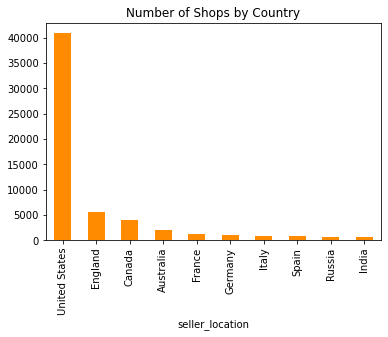

In [41]:
by_country = data[['seller_location']].groupby(by='seller_location').size().sort_values(ascending=False)
by_country.head(n=10).plot.bar(title='Number of Shops by Country', color='darkorange')

<AxesSubplot:title={'center':'Average Sales by Country'}, xlabel='seller_location'>

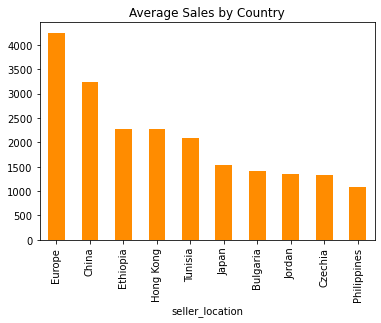

In [43]:
sales_by_country = data.groupby('seller_location')['number_of_sales'].mean().sort_values(ascending=False)
sales_by_country.head(n=10).plot.bar(title='Average Sales by Country', color='darkorange')

* The US has by far the biggest number of Etsy shops, but the average sales is highest in Europe, China, Ethiopia, and Hong Kong

In [44]:
by_join_date = data[['seller_join_date']].groupby(by='seller_join_date').size()
by_join_date

seller_join_date
2005      50
2006     329
2007     961
2008    1954
2009    2597
2010    3153
2011    4184
2012    4694
2013    5762
2014    6104
2015    6604
2016    7182
2017    8058
2018    8567
2019    5335
dtype: int64

<AxesSubplot:title={'center':'Number of Shops by Year'}, xlabel='seller_join_date'>

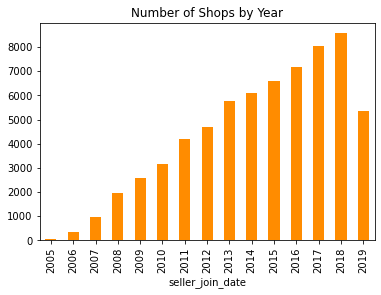

In [46]:
by_join_date.plot.bar(title='Number of Shops by Year', color='darkorange')

<AxesSubplot:title={'center':'Average Sales by Year'}, xlabel='seller_join_date'>

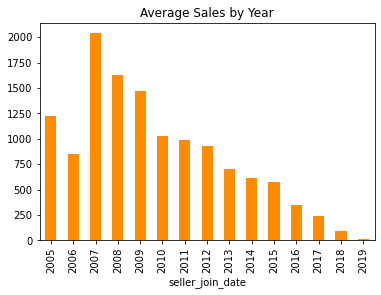

In [48]:
sales_by_year = data.groupby('seller_join_date')['number_of_sales'].mean()
sales_by_year.plot.bar(title='Average Sales by Year', color='darkorange')

* Since this data was obtained in July of 2019, the number of shops joining Etsy was steadily increasing since the foundation of Etsy in 2015
* The average sales is at peak in shops that joined Etsy in 2007, indicating that shops that joined Etsy in 2007 and after has continued to raise sales

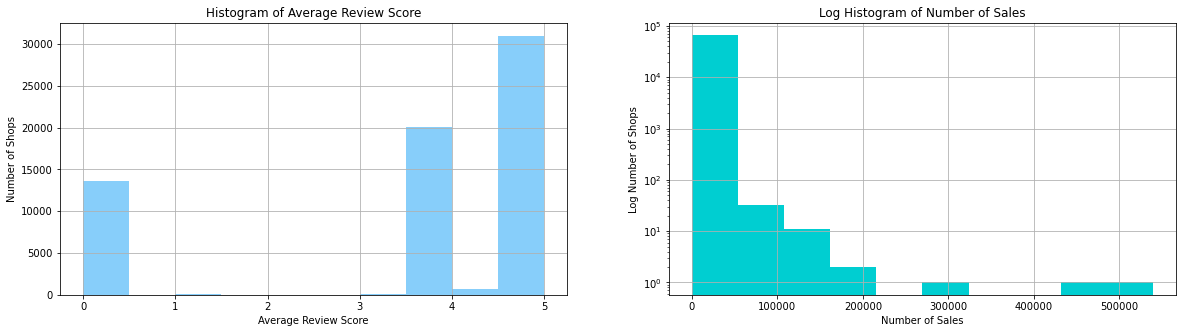

In [83]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
n, bins, patches = plt.hist(data['average_review_score'], log=False, facecolor='lightskyblue')
plt.xlabel('Average Review Score')
plt.ylabel('Number of Shops')
plt.title('Histogram of Average Review Score')
plt.grid(True)

plt.subplot(122)
n, bins, patches = plt.hist(data['number_of_sales'], log=True, facecolor='darkturquoise')
plt.xlabel('Number of Sales')
plt.ylabel('Log Number of Shops')
plt.title('Log Histogram of Number of Sales')
plt.grid(True)

plt.show()

* Overall, the average review score was less than 0.5 or bigger than 4.5 (because I added the average for null values), meaning etsy uesrs rate shops either highly or poorly, not much in the middle
* Most of the average review score for shops are greater than 4.5
* Took log of the number of shops for the second histogram because most of the shops have less than 50,000 sales

In [66]:
data['sold'] = data['number_of_sales'] > 0
data.head()

,seller_id,seller_location,seller_join_date,number_of_sales,number_of_reviews,average_review_score,number_of_items,sold
0,1,India,2018,0,0,0.0000,2,False
1,2,France,2017,14,2,4.0000,0,True
2,3,United States,2016,137,18,5.0000,15,True
3,4,England,2019,0,0,0.0000,3,False
4,5,United States,2012,13995,2087,4.9218,369,True


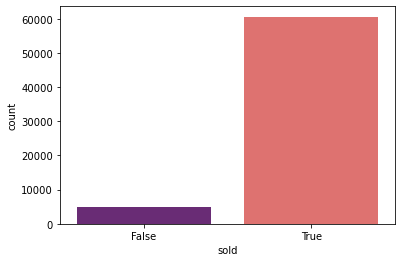

In [67]:
sns.countplot(x='sold', data=data, palette='magma')
plt.show()

* Most stores have sales

In [101]:
x = data[['average_review_score','number_of_items']]
y = data['sold']

logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.146129
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                   sold   No. Observations:                65534
Model:                          Logit   Df Residuals:                    65532
Method:                           MLE   Df Model:                            1
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.4498
Time:                        20:52:30   Log-Likelihood:                -9576.4
converged:                       True   LL-Null:                       -17407.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
average_review_score     1.8489      0.051     35.908      0.000       1.748       1.95

In [104]:
print('the odds ratio of average review score is ', math.exp(1.8489))
print('the odds ratio of number of items is ', math.exp(0.0186))

the odds ratio of average review score is  6.352827567407349
the odds ratio of number of items is  1.0187740574816226


Logistic regression shows that:
* the odds of sales increase by a factor of 6.35 for every unit increase in average review score
* the odds of sales increase by a factor of 1.02 for every unit increase in number of items

However, due to the ununified distribution of the average review score, complete quasi-separation is deteceted.

In [100]:
#data['natural_log'] = np.log(data['number_of_sales'])
#data.head()

# Final Code

In [117]:
Scraped_data = pd.read_excel('/Users/macbook/Desktop/etsyfinal4.xlsx')
Scraped_data.head()

,Sales,Announcement,Admirer,Badge,Category,Shipping,Review,Reply,Year,Seller,Announce,Location,Rating,Total Items,Image
0,35865.0,"If you're planning a wedding, we invite you to...",46618.0,0,20,0,1,1,2008.0,jewelrybyjohan,1,"Oakdale, Minnesota",5.0,829,1
1,369750.0,Thank you all for a great 2022! We can't wait ...,40476.0,0,21,0,1,1,2008.0,zoeysattic,1,"St Louis, Missouri",5.0,5038,1
2,369755.0,Thank you all for a great 2022! We can't wait ...,40476.0,0,21,0,1,1,2008.0,zoeysattic,1,"St Louis, Missouri",5.0,5038,1
3,369757.0,Thank you all for a great 2022! We can't wait ...,40476.0,0,21,0,1,1,2008.0,zoeysattic,1,"St Louis, Missouri",5.0,5038,1
4,7283.0,Check out my new listings! More to come daily!...,2981.0,1,17,1,1,1,2007.0,1000WordPhotoShop,1,"Olympia, Washington",5.0,104,1


In [118]:
Scraped_data['Sales'].describe()

count      5995.000000
mean      11110.857548
std       32165.482278
min           2.000000
25%         910.000000
50%        3175.000000
75%        9465.000000
max      950812.000000
Name: Sales, dtype: float64

In [138]:
threshold=np.percentile(Scraped_data['Sales'], 50)
print(threshold)
Scraped_data['Sales Dummy']=0
Scraped_data['Sales Dummy'] = Scraped_data['Sales'].apply(lambda x: 1 if x>=threshold else 0)

3148.0


In [139]:
Scraped_data

,Sales,Announcement,Admirer,Badge,Category,Shipping,Review,Reply,Year,Seller,Announce,Location,Rating,Total Items,Image,Sales Dummy
0,35865.0,"If you're planning a wedding, we invite you to...",46618.0,0,20,0,1,1,2008.0,jewelrybyjohan,1,"Oakdale, Minnesota",5.0,829.0,1,1
1,369750.0,Thank you all for a great 2022! We can't wait ...,40476.0,0,21,0,1,1,2008.0,zoeysattic,1,"St Louis, Missouri",5.0,5038.0,1,1
4,7283.0,Check out my new listings! More to come daily!...,2981.0,1,17,1,1,1,2007.0,1000WordPhotoShop,1,"Olympia, Washington",5.0,104.0,1,1
5,13691.0,"Fake Cakes, Ice Cream Cones, Fake Cupcakes & O...",11495.0,1,20,1,1,1,0.0,12LegsCuriosities,1,0,5.0,686.0,1,1
6,10408.0,I also sell under the name Stitch Morgantown o...,1444.0,1,15,1,1,1,2008.0,15PiecesofFlair,1,"Fairmont, West Virginia",5.0,934.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,929.0,0,60.0,1,11,1,1,1,0.0,zray,1,"Cincinnati, Ohio",5.0,204.0,1,0
6005,99.0,Welcome to my shop! Custom orders welcome. Spr...,936.0,1,12,1,1,1,0.0,ZuriZenDesigns,1,0,5.0,86.0,1,0
6006,236.0,Cats rule! =^-^=,367.0,0,7,0,0,0,2009.0,beckyzimm,1,"Tucson, Arizona",5.0,77.0,1,0
6007,5497.0,"What you can expect, here at Parish Farmgirl ....",2643.0,0,13,1,1,0,2009.0,ParishFarmgirl,1,"Saint Francisville, Louisiana",5.0,77.0,1,1


In [140]:
Scraped_data['Total Items'] = Scraped_data['Total Items'].apply(lambda x: 1 if x == '1 item' else x)
Scraped_data['Total Items']=Scraped_data['Total Items'].astype(float)

In [141]:
Scraped_data.dtypes

Sales           float64
Announcement     object
Admirer         float64
Badge             int64
Category          int64
Shipping          int64
Review            int64
Reply             int64
Year            float64
Seller           object
Announce          int64
Location         object
Rating          float64
Total Items     float64
Image             int64
Sales Dummy       int64
dtype: object

In [142]:
Scraped_data.fillna(0, inplace=True)
Scraped_data.drop_duplicates(subset=['Seller'],inplace=True)

In [146]:
Scraped_data.to_excel('/Users/macbook/Desktop/ETSYCLEAN.xlsx')

# Logistic Reg (Dummy Sales)

----- SAMAN NOTE: The threshold is 50% and the result is good!

In [144]:
x = Scraped_data[['Rating','Image','Announce','Admirer','Badge','Category','Shipping','Review','Total Items','Year','Reply']]
y = Scraped_data['Sales Dummy']

logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.425090
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Sales Dummy   No. Observations:                 5992
Model:                          Logit   Df Residuals:                     5981
Method:                           MLE   Df Model:                           10
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.3867
Time:                        10:48:09   Log-Likelihood:                -2547.1
converged:                       True   LL-Null:                       -4153.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Rating          0.2992      0.076      3.943      0.000       0.151       0.448
Image          -0.0902    

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model on the training set
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Predict sales on the testing set
y_pred = logreg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 78.56547122602169


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistic Regression (Badge)

----- SAMAN NOTE: This NaN is very strange! but accuracy is good! I do selection but the accuracy drop So I think we should ignore Badge as the target variable. 

In [149]:
x = Scraped_data[['Rating','Image','Announce','Admirer','Sales','Category','Shipping','Review','Total Items','Year','Reply']]
y = Scraped_data['Badge']

logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary())

         Current function value: inf
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Badge   No. Observations:                 5992
Model:                          Logit   Df Residuals:                     5981
Method:                           MLE   Df Model:                           10
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                    -inf
Time:                        10:56:57   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                       -4081.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Rating       9.221e+08   6.72e+17   1.37e-09      1.000   -1.32e+18    1.32e+18
Image        3.258e+04   1.25e+35    2.6e-31      1.000   -2.46e+35

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model on the training set
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Predict sales on the testing set
y_pred = logreg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 73.7281067556297


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [151]:
import statsmodels.api as sm

# Select relevant columns
x = Scraped_data[['Rating', 'Sales', 'Category', 'Total Items', 'Year']]

# Add constant term for intercept
x = sm.add_constant(x)

y = Scraped_data['Badge']

# Fit logistic regression model with L-BFGS optimizer
logit_model = sm.Logit(y, x, method='lbfgs')
result = logit_model.fit()

# Print model summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.613482
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  Badge   No. Observations:                 5992
Model:                          Logit   Df Residuals:                     5986
Method:                           MLE   Df Model:                            5
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                 0.09935
Time:                        10:57:15   Log-Likelihood:                -3676.0
converged:                       True   LL-Null:                       -4081.5
Covariance Type:            nonrobust   LLR p-value:                4.761e-173
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -26.7763      2.972     -9.011      0.000     -32.600     -20.952
Rating          5.1240   

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['method']
  warnings.warn(msg, ValueWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['method']
  warnings.warn(msg, ValueWarning)


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model on the training set
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Predict sales on the testing set
y_pred = logreg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 58.798999165971644


# Linear Regression (Number of Sales)

In [161]:
from sklearn.linear_model import LinearRegression

x = Scraped_data[['Rating','Image','Announce','Admirer','Badge','Category','Shipping','Review','Total Items','Year','Reply']]
y = Scraped_data['Sales']

# add a constant term to the input data
x = sm.add_constant(x)

# fit the OLS model
model = sm.OLS(y, x).fit()

# print the summary table
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     638.0
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:14:13   Log-Likelihood:                -68383.
No. Observations:                5992   AIC:                         1.368e+05
Df Residuals:                    5981   BIC:                         1.369e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Rating       -349.1241    295.948     -1.180      

----- SAMAN NOTE : Now the R sqaure is not good we can work on it by doing feature engineering like log and etc